<a href="https://colab.research.google.com/github/kdtrinh/probabilitytheoryandpython/blob/main/Wigner_semicircle_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wigner's semicircle law

> Objective: to illustrate well-known Wigner's semicircle law in random matrix theory.

Let $\{Z_{ij}\}_{i<j}$ and $\{Y_i\}_{i \ge 1}$ be two i.i.d. sequences of random variables, independent of each others satisfying the following conditions:

- All moments are finite

  $$
    \mathbb E[|Z_{12}|^k] < \infty, \quad \mathbb E[|Y_1|^k] < \infty, \quad \forall k=1,2,\dots.
  $$

- Mean zero: 
  $$
    \mathbb E[Z_{12}] = 0, \quad \mathbb E[Y_1] = 0.
  $$

- The variance of $Z_{12}$ is 1:
  $$
    \mathrm{Var}[Z_{12}] = \mathbb E [Z_{12}^2] = 1.
  $$

Then for each $N$, a Wigner matrix $X_N$ is constructed as 
$$
  X_{N}(i, j) = \frac{1}{\sqrt N}
  \begin{cases}
    Z_{ij}, & (i<j),\\
    Z_{ji}, & (i>j),\\
    Y_i, & (i=j).
  \end{cases}
$$

**Theorem (Wigner's semicircle law).**
Let $\lambda_1 \le \lambda_2 \le \cdots \le \lambda_N$ be the eigenvalues of $X_N$. Then the empirical distribution 
$$
  L_N = \frac 1N \sum_{i=1}^N \delta_{\lambda_i}
$$
converges weakly to the semicircle distribution, almost surely. Here 
- $\delta_{\lambda}$ denotes the Dirac measure at $\lambda \in \mathbb R$,
- the semicircle distribution is the distribution with the probability density function
  $$
    sc(x) = \frac{1}{2\pi} \sqrt{4 - x^2}, \quad x \in [-2, 2]. 
  $$

__References__

>[1] G.W. Anderson, A. Guionnet and O. Zeitouni: An Introduction to Random Matrices, Cambridge Studies in Advanced Mathematics, vol. 118, Cambridge University Press, Cambridge, 2010.


# Illustration of Wigner's semicircle law

*Process.* 

1. Choose two distributions $F_1$ and $F_2$ with mean zero and all finite moments, $F_1$ with variance one for $Z_{ij}$.

1. For given $N$, generate a random sequence $\{z_{ij}\}_{1 \le i<j \le N}$ from the distribution $F_1$, and a random sequence $\{y_i\}_{1 \le i \le N}$ from the distribution $F_2$.

1. Construct the matrix $X_N$ by 
  $$
  X_{N}(i, j) = \frac{1}{\sqrt N}
  \begin{cases}
    z_{ij}, & (i<j),\\
    z_{ji}, & (i>j),\\
    y_i, & (i=j).
  \end{cases}
  $$

1. Calculate the eigenvalues $\lambda = (\lambda_1, \dots, \lambda_N)$ of $X_N$.

1. Draw a histogram of $\lambda$ and the density $sc(x)$ of the semicircle distribution.

## $F_1$ and $F_2$ are Bernoulli distributions: $\mathbb P(1) = \mathbb P(-1) = \frac12$

In [69]:
# Generate a Wigner matrix X_N
from numpy import random, sqrt

N = 4

# Generate a matrix z of i.i.d. entries 
rng = random.default_rng()
z = rng.choice([-1, 1], size=(N, N), p=(1/2, 1/2))
print("An i.i.d. matrix z: \n", z)
# y_i = z_{ii}

# Define a Wigner matrix X_N
X_N = 1/sqrt(N) * z
for i in range(N):
  for j in range(i+1, N):
    X_N[j, i] = 1/sqrt(N) * z[i, j]

print("X_N:\n", X_N)

An i.i.d. matrix z: 
 [[ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1 -1  1 -1]]
X_N:
 [[ 0.5 -0.5  0.5 -0.5]
 [-0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5]]


In [58]:
# Calculate the eigenvalues of X_N
from numpy import linalg

lam, ev = linalg.eig(X_N)
print(lam)

[-1.12457027e+00  1.55138752e+00  4.39415915e-17  5.73182745e-01]


<function matplotlib.pyplot.show>

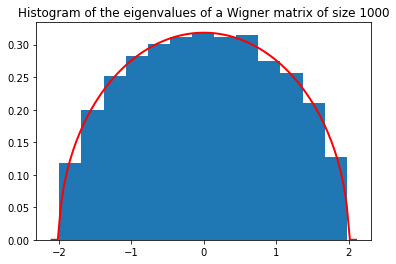

In [72]:
# N = 1000
N=1000

# Generate a matrix z of i.i.d. entries 
rng = random.default_rng()
z = rng.choice([-1, 1], size=(N, N), p=(1/2, 1/2))

# Generate a Wigner matrix X_N
X_N = 1/sqrt(N) * z
for i in range(N):
  for j in range(i+1, N):
    X_N[j, i] = 1/sqrt(N) * z[i, j]

# Calculate the eigenvalues of X_N
lam, ev = linalg.eig(X_N)

# plot the histogram of the eigenvalues lam
# define the function sc, the density of the semicircle distribution
import matplotlib.pyplot as plt
from numpy import linspace

def sc(x):
  if (x<-2) | (x>2):
    return 0
  else:
    return (1/(2 * pi)) * sqrt(4 - x**2)

count, bins, ignored = plt.hist(lam, bins='auto', density=True) # arguments are passed to np.histogram
plt.title("Histogram of the eigenvalues of a Wigner matrix of size " + str(N)) 
x = linspace(-2.1, 2.1, 100)
y = [sc(xi) for xi in x]
plt.plot(x, y, linewidth=2, color='r')
plt.show

## Gaussian Orthogonal Ensembles (GOE)

This is the case where $F_1 = \mathcal N(0, 1)$ and $F_2 = \mathcal N(0, 2)$. We can define a GOE matrix in the following way: 
- Let $G_N$ be a random matrix of i.i.d. entries of standard Gaussian distribution $\mathcal N(0, 1)$. 
- Define 
  $$
    X_N = \frac{1}{\sqrt {2N}}(G_N + G_N^t),
  $$
where $G_N^t$ is the transpose of $G_N$.


In [63]:
from numpy import random, sqrt
N = 10 # N is the size of a matrix

gauss_N = random.default_rng().normal(size=(N, N)) # a random matrix of size N with iid entries of standard Gaussian distribution

X_N = (gauss_N + np.matrix.transpose(gauss_N))/sqrt(2*N) # a Wigner matrix of size N

print(X_N)

# Calculate the eigenvalues of X_N
from numpy import linalg 
lam, ev = linalg.eig(X_N) # calculate the eigenvalues and eigenvectors of X_N
print("The eigenvalues of X_N:", lam)

[[-1.06523284 -0.57954487 -0.2829942  -0.09171383 -0.26363379 -0.65112616
  -0.16368287 -0.03815079 -0.18443371 -0.53286341]
 [-0.57954487  0.57069443 -0.39837474  0.02510052  0.05755637 -0.81420833
  -0.02698455 -0.13737981  0.80615562 -0.23564904]
 [-0.2829942  -0.39837474  0.0442044   0.41528646 -0.10512574  0.25179992
  -0.04432952  0.07624514  0.64520019 -0.34474693]
 [-0.09171383  0.02510052  0.41528646  0.74940126 -0.14980014 -0.09779647
  -0.22151911 -0.50406959 -0.03875    -0.06651832]
 [-0.26363379  0.05755637 -0.10512574 -0.14980014 -0.2136884   0.1456822
   0.23986095 -0.0824263  -0.19606633  0.18978454]
 [-0.65112616 -0.81420833  0.25179992 -0.09779647  0.1456822  -0.09387136
  -0.32827267 -0.05155534 -0.08513054 -0.41038358]
 [-0.16368287 -0.02698455 -0.04432952 -0.22151911  0.23986095 -0.32827267
  -0.26814928  0.22322804 -0.47797707 -0.02351098]
 [-0.03815079 -0.13737981  0.07624514 -0.50406959 -0.0824263  -0.05155534
   0.22322804  0.05103055 -0.3974547   0.50377171]
 

[-2.14527138 -1.39574452 -0.64621767  0.10330919  0.85283605  1.60236291]


array([-2.14527138, -1.39131158,  1.60236291,  1.41071093, -0.74222975,
       -0.39043774,  0.60123433,  0.42957653,  0.18999202, -0.01225239])

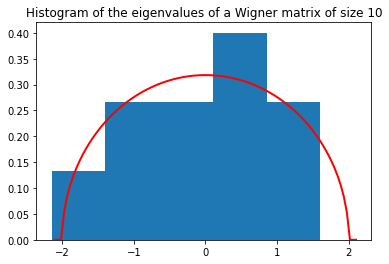

In [65]:
# plot the histogram of the eigenvalues

from numpy import sqrt, pi, linspace
import matplotlib.pyplot as plt

# define the function sc, the density of the semicircle distribution
def sc(x):
  if (x<-2) | (x>2):
    return 0
  else:
    return (1/(2 * pi)) * sqrt(4 - x**2)

# Plot a histogram of lam together with the density sc
count, bins, ignored = plt.hist(lam, bins='auto', density=True) # arguments are passed to np.histogram
plt.title("Histogram of the eigenvalues of a Wigner matrix of size " + str(N)) 
x = linspace(-2.1, 2.1, 100)
y = [sc(xi) for xi in x]
plt.plot(x, y, linewidth=2, color='r')
plt.show
print(bins)
lam


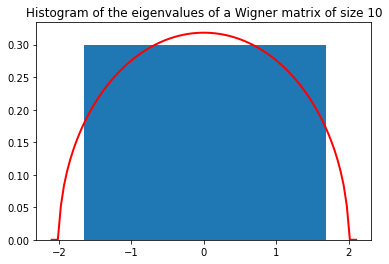

In [66]:
from numpy import sqrt, random, pi, linalg
import matplotlib.pyplot as plt

def sc(x):
  pass

def GOE(N):
  # Generate a GOE matrix of size N
  gauss_N = random.default_rng().normal(size=(N, N)) # a random matrix of size N with iid entries of standard Gaussian distribution
  X_N = (gauss_N + np.matrix.transpose(gauss_N))/sqrt(2*N) # a Wigner matrix of size N

  # Calculate the eigenvalues of X_N
  lam, ev = linalg.eig(X_N) # calculate the eigenvalues and eigenvectors of X_N

  # Plot a histogram of the eigenvalues
  count, bins, ignored = plt.hist(lam, bins='auto', density=True) # arguments are passed to np.histogram
  plt.title("Histogram of the eigenvalues of a Wigner matrix of size " + str(N)) 
  x = linspace(-2.1, 2.1, 100)
  y = [sc(xi) for xi in x]
  plt.plot(x, y, linewidth=2, color='r')
  plt.show

def sc(x):
  if (x<-2) | (x>2):
    return 0
  else:
    return (1/(2 * pi)) * sqrt(4 - x**2)

GOE(10)

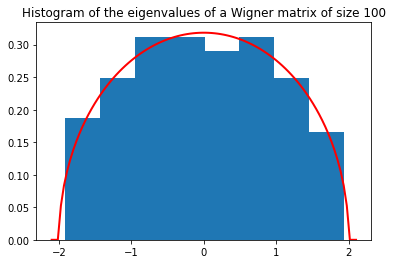

In [67]:
GOE(100)

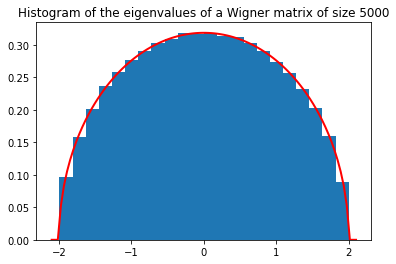

In [68]:
GOE(5000)

## Author

<a href="https://sites.google.com/site/kdtrinhprob/Home" target="_blank">Khanh Duy Trinh</a>

> 2021-08-25: Created